In [217]:
import re
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Tiền xử lý dữ liệu

In [1]:
with open('../lecture3/sentiment.txt') as f:
    sentiment = f.readlines()
    
text_processing = []
for i in sentiment:
    text_processing.append(i.strip().lower().split('\t'))

In [2]:
text_processing

[['wow... loved this place.', '1'],
 ['crust is not good.', '0'],
 ['not tasty and the texture was just nasty.', '0'],
 ['stopped by during the late may bank holiday off rick steve recommendation and loved it.',
  '1'],
 ['the selection on the menu was great and so were the prices.', '1'],
 ['now i am getting angry and i want my damn pho.', '0'],
 ["honeslty it didn't taste that fresh.)", '0'],
 ['the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
  '0'],
 ['the fries were great too.', '1'],
 ['a great touch.', '1'],
 ['service was very prompt.', '1'],
 ['would not go back.', '0'],
 ['the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced.',
  '0'],
 ['i tried the cape cod ravoli, chicken,with cranberry...mmmm!', '1'],
 ['i was disgusted because i was pretty sure that was human hair.', '0'],
 ['i was shocked because no signs indicate cash only.', '0'],
 ['highly recommended.', '1'

In [219]:
data = []
label = []

for i in range(len(text_processing)):
    data.append(re.sub(r'[^\w\s]', '', text_processing[i][0].strip()))
    label.append(int(text_processing[i][1]))
    

In [220]:
len(max(data))

57

In [221]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(data)
X = pad_sequences(sequences, maxlen=len(max(data)))
y = np.array(label)

In [222]:
tokenizer.index_word.values()

dict_values(['the', 'and', 'i', 'was', 'a', 'to', 'is', 'this', 'it', 'of', 'food', 'not', 'for', 'in', 'place', 'good', 'service', 'we', 'very', 'my', 'with', 'great', 'had', 'that', 'be', 'so', 'were', 'are', 'but', 'have', 'back', 'you', 'they', 'here', 'on', 'at', 'like', 'go', 'all', 'time', 'our', 'will', 'as', 'really', 'just', 'there', 'an', 'their', 'if', 'best', 'would', 'ever', 'dont', 'also', 'only', 'never', 'friendly', 'one', 'up', 'no', 'your', 'restaurant', 'out', 'nice', 'again', 'from', 'been', 'what', 'amazing', 'delicious', 'did', 'by', 'vegas', 'which', 'im', 'some', 'came', 'its', 'when', 'ive', 'experience', 'pretty', 'staff', 'get', 'eat', 'us', 'minutes', 'love', 'even', 'or', 'disappointed', 'wont', 'he', 'me', 'bad', 'much', 'definitely', 'got', 'well', 'going', 'made', 'first', 'more', 'about', 'could', 'say', 'think', 'chicken', 'better', 'menu', 'too', 'salad', 'has', 'stars', 'always', 'than', 'how', 'can', 'pizza', 'fresh', 'being', 'because', 'worst', '

In [223]:
X

array([[  0,   0,   0, ..., 162,   8,  15],
       [  0,   0,   0, ...,   7,  12,  16],
       [  0,   0,   0, ...,   4,  45, 425],
       ...,
       [  0,   0,   0, ...,  12,  38,  31],
       [  0,   0,   0, ..., 136, 157,  40],
       [  0,   0,   0, ..., 347,   1, 275]], dtype=int32)

# split train, test, valid

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [225]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=0)

In [226]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)


In [227]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((800, 57), (800, 1), (140, 57), (140, 1), (60, 57), (60, 1))

# build model

In [228]:
# Xây dựng mạng neural
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=X_train.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model.add(tf.keras.layers.Dropout(.3))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model.add(tf.keras.layers.Dropout(.3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [229]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 57, 100)           208100    
                                                                 
 flatten_33 (Flatten)        (None, 5700)              0         
                                                                 
 dense_74 (Dense)            (None, 128)               729728    
                                                                 
 dense_75 (Dense)            (None, 1)                 129       
                                                                 
Total params: 937,957
Trainable params: 937,957
Non-trainable params: 0
_________________________________________________________________


In [230]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [231]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


25/25 [==============================] - 3s 87ms/step - loss: 1.6467 - accuracy: 0.5213 - val_loss: 0.8149 - val_accuracy: 0.5571
Epoch 2/50
25/25 [==============================] - 2s 70ms/step - loss: 0.7322 - accuracy: 0.5875 - val_loss: 0.7120 - val_accuracy: 0.5143
Epoch 3/50
25/25 [==============================] - 1s 36ms/step - loss: 0.6336 - accuracy: 0.8800 - val_loss: 0.6799 - val_accuracy: 0.7429
Epoch 4/50
25/25 [==============================] - 1s 40ms/step - loss: 0.4967 - accuracy: 0.9388 - val_loss: 0.6875 - val_accuracy: 0.7214
Epoch 5/50
25/25 [==============================] - 1s 28ms/step - loss: 0.3667 - accuracy: 0.9750 - val_loss: 0.6326 - val_accuracy: 0.7571
Epoch 6/50
25/25 [==============================] - 1s 22ms/step - loss: 0.2825 - accuracy: 0.9875 - val_loss: 0.6413 - val_accuracy: 0.7214
Epoch 7/50
25/25 [==============================] - 0s 18ms/step - loss: 0.2294 - accuracy: 0.9950 - val_loss: 0.6541 - val_accuracy: 0.7071
Epoch 8/50
25/25 [======

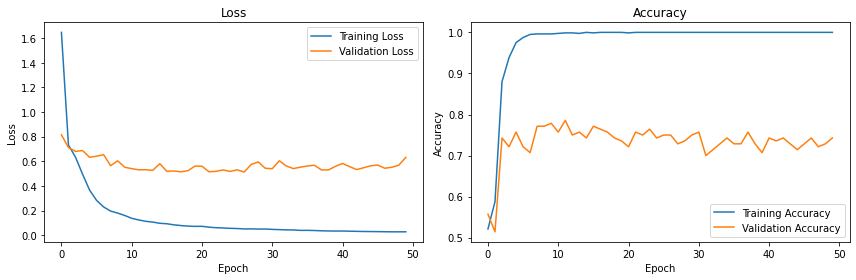

In [232]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Vẽ đồ thị loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [233]:
# Đánh giá mô hình trên tập validation
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


2/2 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 0.8167
Validation Loss: 0.4790
Validation Accuracy: 81.67%
